### Homework: 5
### Name: Daniel Jang
### GitHub: hjang8659
### USC ID: 6894-6426-04
### Due: Mar 22, 2024

In [1]:
# df Manipulation and Analysis
import pandas as pd
import numpy as np
import math
import re
import os
import glob

# df Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Modeling
import statsmodels.api as sm

# Machine Learning Algorithms and Model Building
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import DistanceMetric
from scipy.linalg import pinv
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.utils import resample
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import _tree
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
import xgboost as xgb

# Feature Scaling and Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

### 1.
### (a)

In [2]:
column_names = ['Temperature', 'Nausea', 'Lumbar_pain', 'Urine_pushing', 'Micturition_pains',
                'Burning_urethra', 'Decision_Inflammation', 'Decision_Nephritis']

df = pd.read_csv("../data/diagnosis.data", header=None, sep='\t', names=column_names, encoding='windows-1252')

### (b)

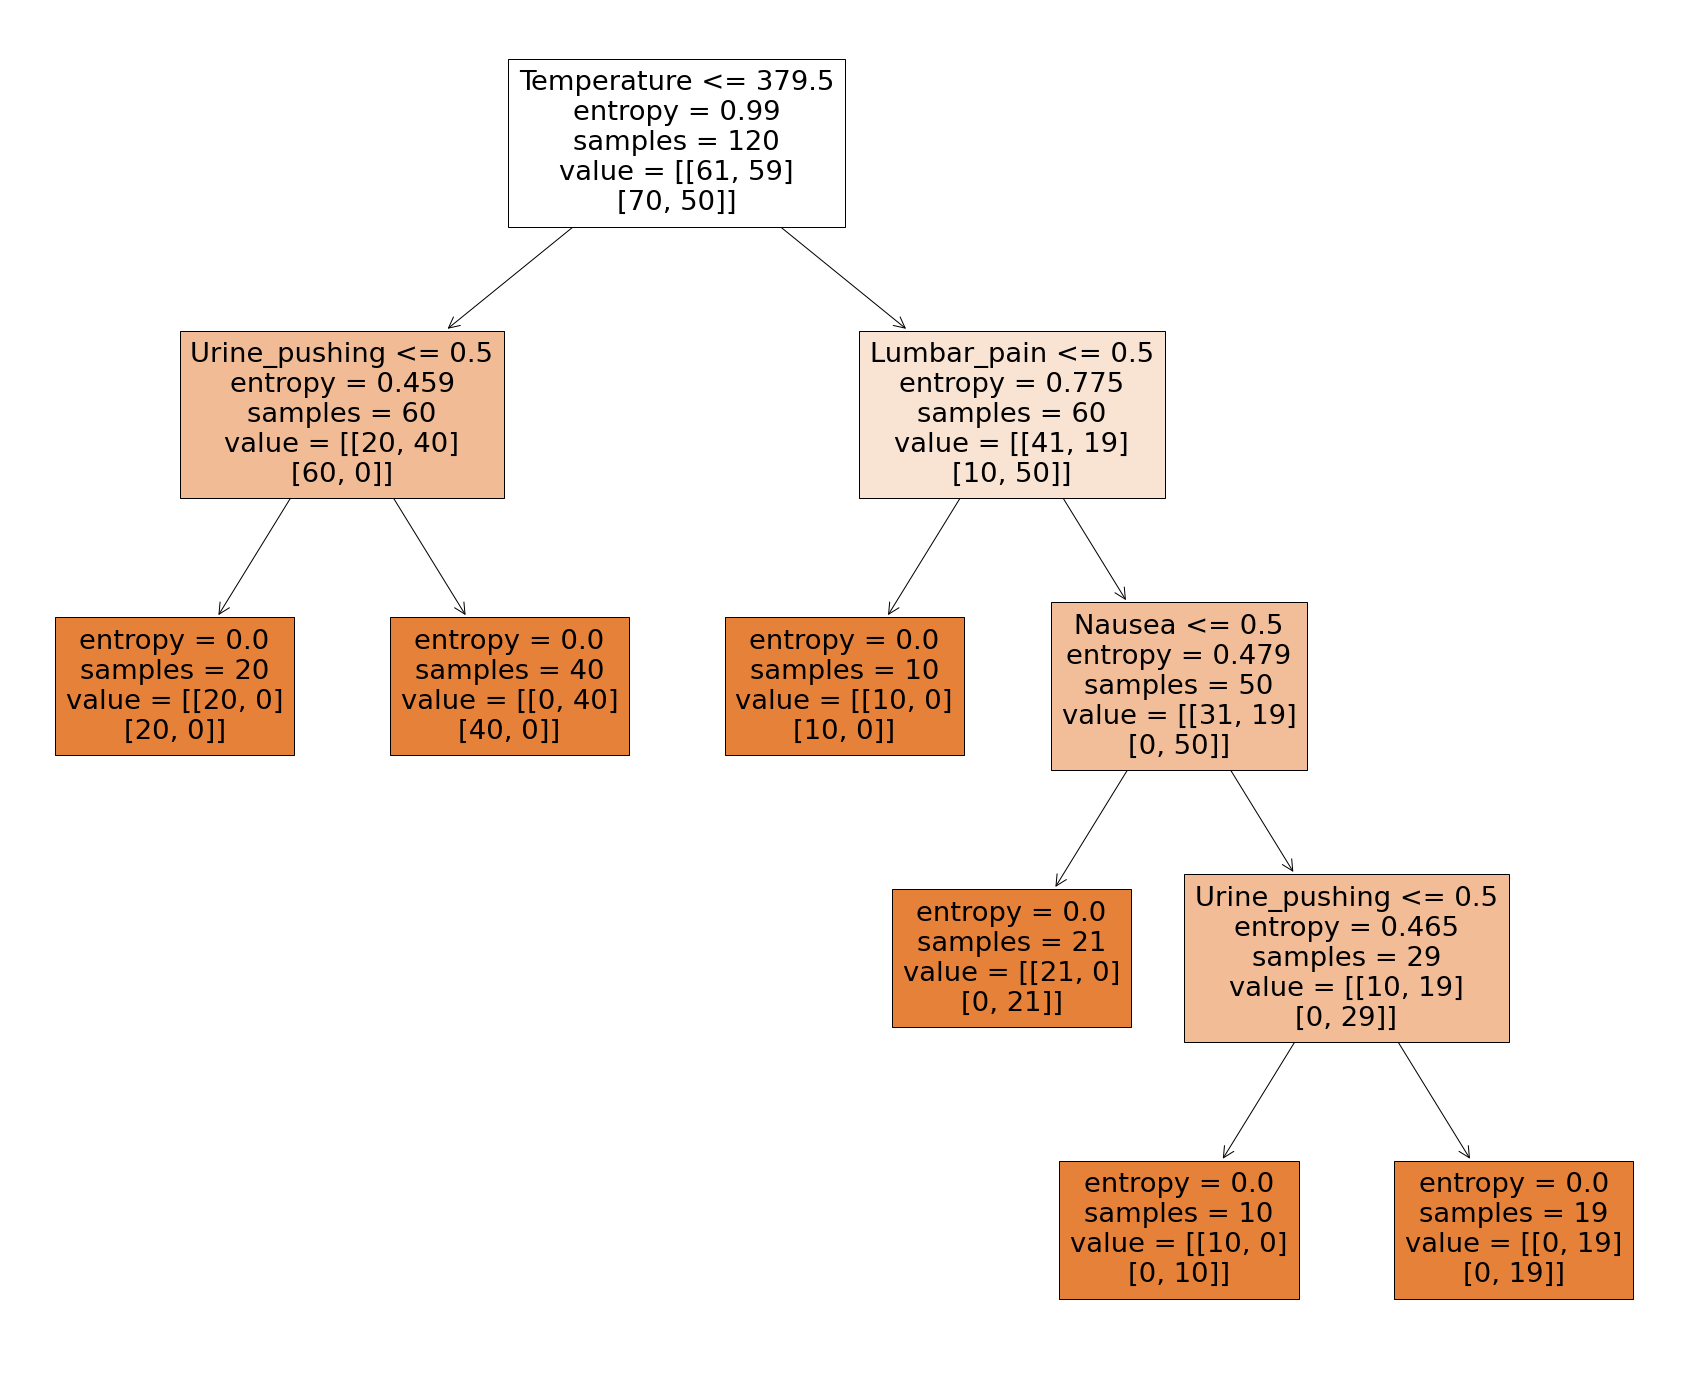

In [3]:
df['Temperature'] = df['Temperature'].str.replace(',', '').astype(float)

binary_columns = ['Nausea', 'Lumbar_pain', 'Urine_pushing', 'Micturition_pains', 'Burning_urethra']
df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})

X = df.drop(['Decision_Inflammation', 'Decision_Nephritis'], axis=1)
y = df[['Decision_Inflammation', 'Decision_Nephritis']]

dt_classifier = tree.DecisionTreeClassifier(criterion='entropy')
dt_classifier.fit(X, y)

plt.figure(figsize=(30, 25))
plot_tree(dt_classifier,feature_names = column_names,filled =True)
dotfile = open("dt.dot", 'w')
tree.export_graphviz(dt_classifier, out_file=dotfile, feature_names=X.columns)
dotfile.close()

### (c)

In [4]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

tree_to_code(dt_classifier, list(X.columns))

def tree(Temperature, Nausea, Lumbar_pain, Urine_pushing, Micturition_pains, Burning_urethra):
  if Temperature <= 379.5:
    if Urine_pushing <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine_pushing > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if Temperature > 379.5
    if Lumbar_pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar_pain > 0.5
      if Nausea <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Nausea > 0.5
        if Urine_pushing <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine_pushing > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


In [5]:
def tree_to_pseudo(tree, feature_names):
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value
    def recurse(left, right, threshold, features, node, depth=0): 
        indent=" "*depth
        if (threshold[node] != -2):
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent,"}")
        else:
            print(indent,"return " + str(value[node]))
    recurse(left, right, threshold, features, 0)

tree_to_pseudo(dt_classifier, list(X.columns))

 if ( Temperature <= 379.5 ) {
  if ( Urine_pushing <= 0.5 ) {
   return [[20.  0.]
 [20.  0.]]
  } else {
   return [[ 0. 40.]
 [40.  0.]]
  }
 } else {
  if ( Lumbar_pain <= 0.5 ) {
   return [[10.  0.]
 [10.  0.]]
  } else {
   if ( Nausea <= 0.5 ) {
    return [[21.  0.]
 [ 0. 21.]]
   } else {
    if ( Urine_pushing <= 0.5 ) {
     return [[10.  0.]
 [ 0. 10.]]
    } else {
     return [[ 0. 19.]
 [ 0. 19.]]
    }
   }
  }
 }


### (d)

{'ccp_alphas': array([0.        , 0.09979604, 0.18809344, 0.22957396, 0.3725747 ]),
 'impurities': array([0.        , 0.19959209, 0.38768553, 0.61725948, 0.98983419])}

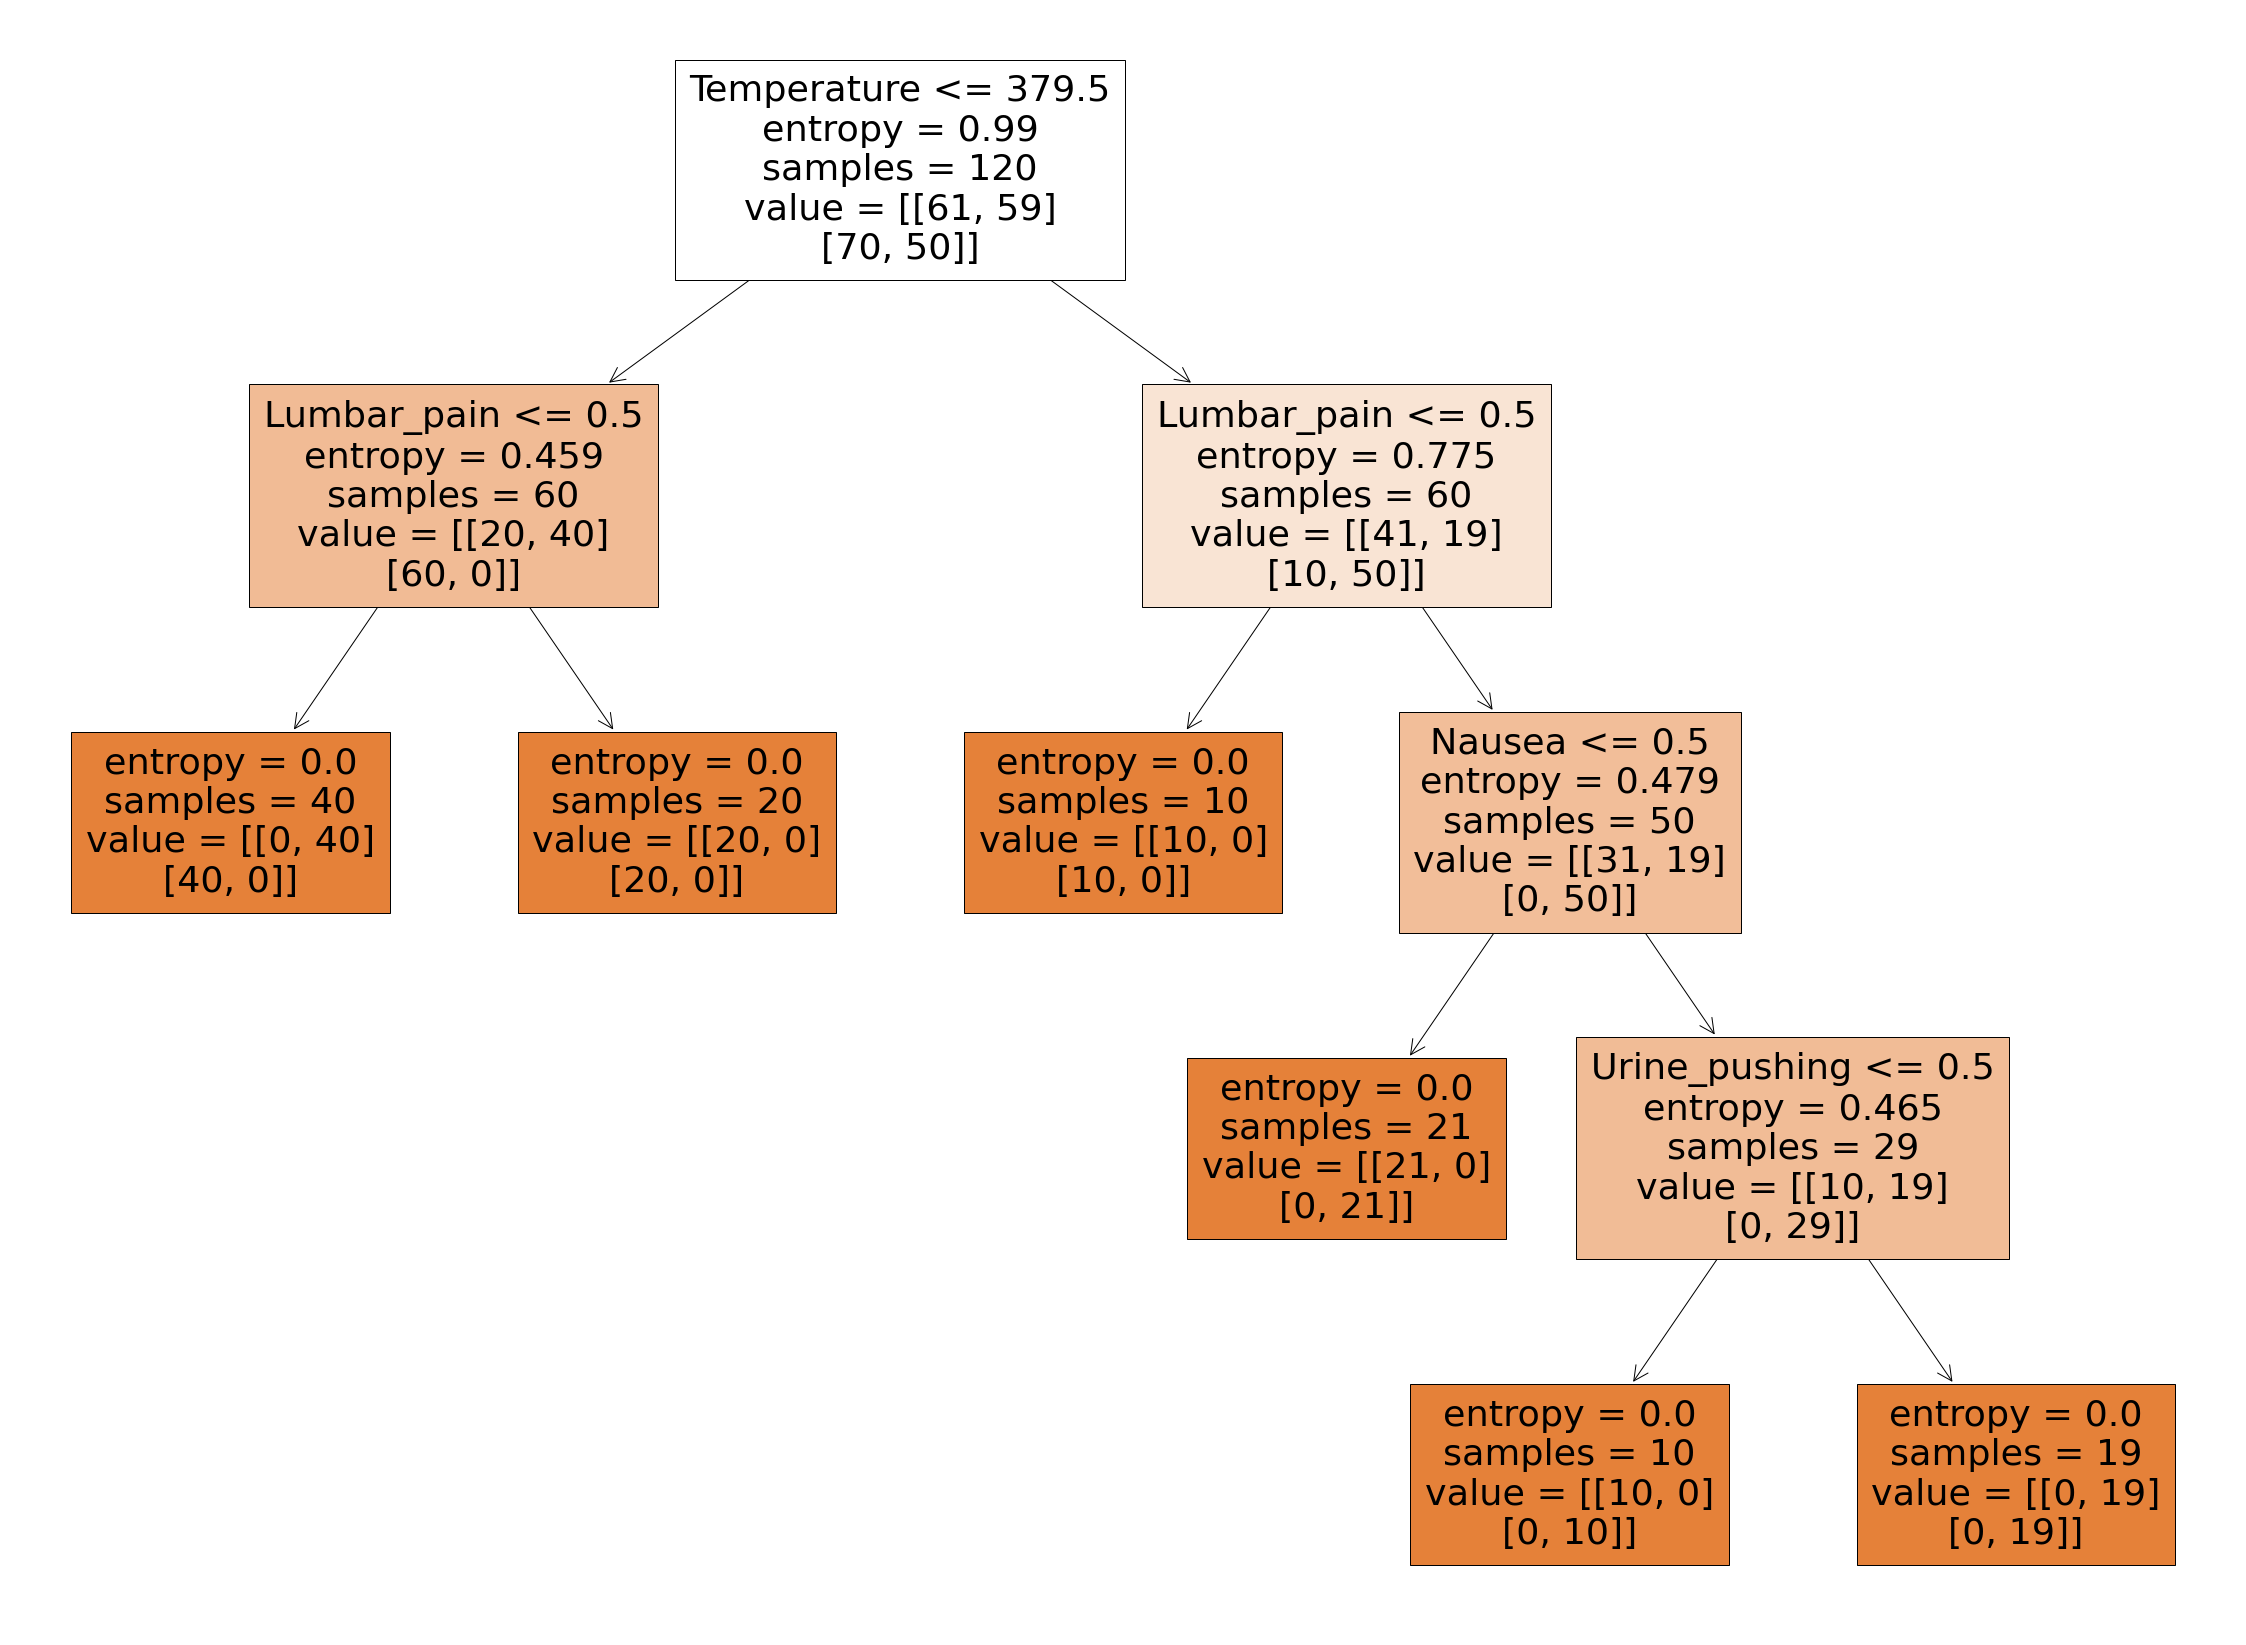

In [6]:
binary = preprocessing.LabelEncoder()
pruning_path = dt_classifier.cost_complexity_pruning_path(X, y)
display(pruning_path)

y_copy = y.copy()

for target_column in y_copy.columns:
    y_copy[target_column] = binary.fit_transform(y_copy[target_column])

params = {'ccp_alpha': pruning_path['ccp_alphas']}

grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=5, n_jobs=-1)
grid_search.fit(X, y_copy)
best_params = grid_search.best_params_

pruned_dt_classifier = tree.DecisionTreeClassifier(criterion='entropy')
X = df.iloc[:, 0:-2]
y = df.iloc[:, -2:]
pruned_dt_classifier.fit(X, y)
plt.figure(figsize=(40, 30))
plot_tree(pruned_dt_classifier, feature_names=column_names, filled=True)
dotfile = open("pruned_decision_tree.dot", 'w')
tree.export_graphviz(pruned_dt_classifier, out_file=dotfile, feature_names=X.columns)


In [7]:
feature_names = X.columns.tolist()

tree_to_code(pruned_dt_classifier, feature_names)

def tree(Temperature, Nausea, Lumbar_pain, Urine_pushing, Micturition_pains, Burning_urethra):
  if Temperature <= 379.5:
    if Lumbar_pain <= 0.5:
      return [[ 0. 40.]
 [40.  0.]]
    else:  # if Lumbar_pain > 0.5
      return [[20.  0.]
 [20.  0.]]
  else:  # if Temperature > 379.5
    if Lumbar_pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar_pain > 0.5
      if Nausea <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Nausea > 0.5
        if Urine_pushing <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine_pushing > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


In [8]:
tree_to_code(pruned_dt_classifier,column_names)

def tree(Temperature, Nausea, Lumbar_pain, Urine_pushing, Micturition_pains, Burning_urethra, Decision_Inflammation, Decision_Nephritis):
  if Temperature <= 379.5:
    if Lumbar_pain <= 0.5:
      return [[ 0. 40.]
 [40.  0.]]
    else:  # if Lumbar_pain > 0.5
      return [[20.  0.]
 [20.  0.]]
  else:  # if Temperature > 379.5
    if Lumbar_pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar_pain > 0.5
      if Nausea <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Nausea > 0.5
        if Urine_pushing <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine_pushing > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


### 2.
### (a) & (b)
### Based on .names file, there are 5 nonpredictive features which are: state, county, community, communityname, and fold. We will drop these column by starting from the 6th column as they are the first five in the .data file.

In [9]:
column_names = []

with open('../data/communities.names') as file:
    for names in file:
        if '@attribute' in names:
            column_names.append(names.split()[1])
df = pd.read_csv('../data/communities.data', sep=',', header = None, names = column_names)
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [10]:
df.replace('?', np.nan, inplace=True)
imputer = SimpleImputer(strategy='mean')

df.iloc[:, 5:] = imputer.fit_transform(df.iloc[:, 5:])

imputed_df = df.iloc[:, 5:]

for column in imputed_df.columns:
    if imputed_df[column].dtype == 'object':
        imputed_df[column] = imputed_df[column].astype('float')

train_data, test_data = imputed_df[:1495], imputed_df[1495:]

display(imputed_df)
display(train_data)
display(test_data)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


### (c)
### note: Color scheme is not visible on GitHub.

In [12]:
imputed_df.corr().style.background_gradient(cmap='plasma')

### (d)

In [12]:
std_dev = imputed_df.iloc[:,:-1].std()
mean = imputed_df.iloc[:,:-1].mean()
cv = std_dev / mean

print("Coefficient of Variation (CV) for each feature:")
print(cv)

Coefficient of Variation (CV) for each feature:
population             2.203503
householdsize          0.353298
racepctblack           1.410920
racePctWhite           0.323782
racePctAsian           1.359162
                         ...   
PolicOperBudg          0.730107
LemasPctPolicOnPatr    0.122331
LemasGangUnitDeploy    0.368040
LemasPctOfficDrugUn    2.555266
PolicBudgPerPop        0.337281
Length: 122, dtype: float64


### (e)

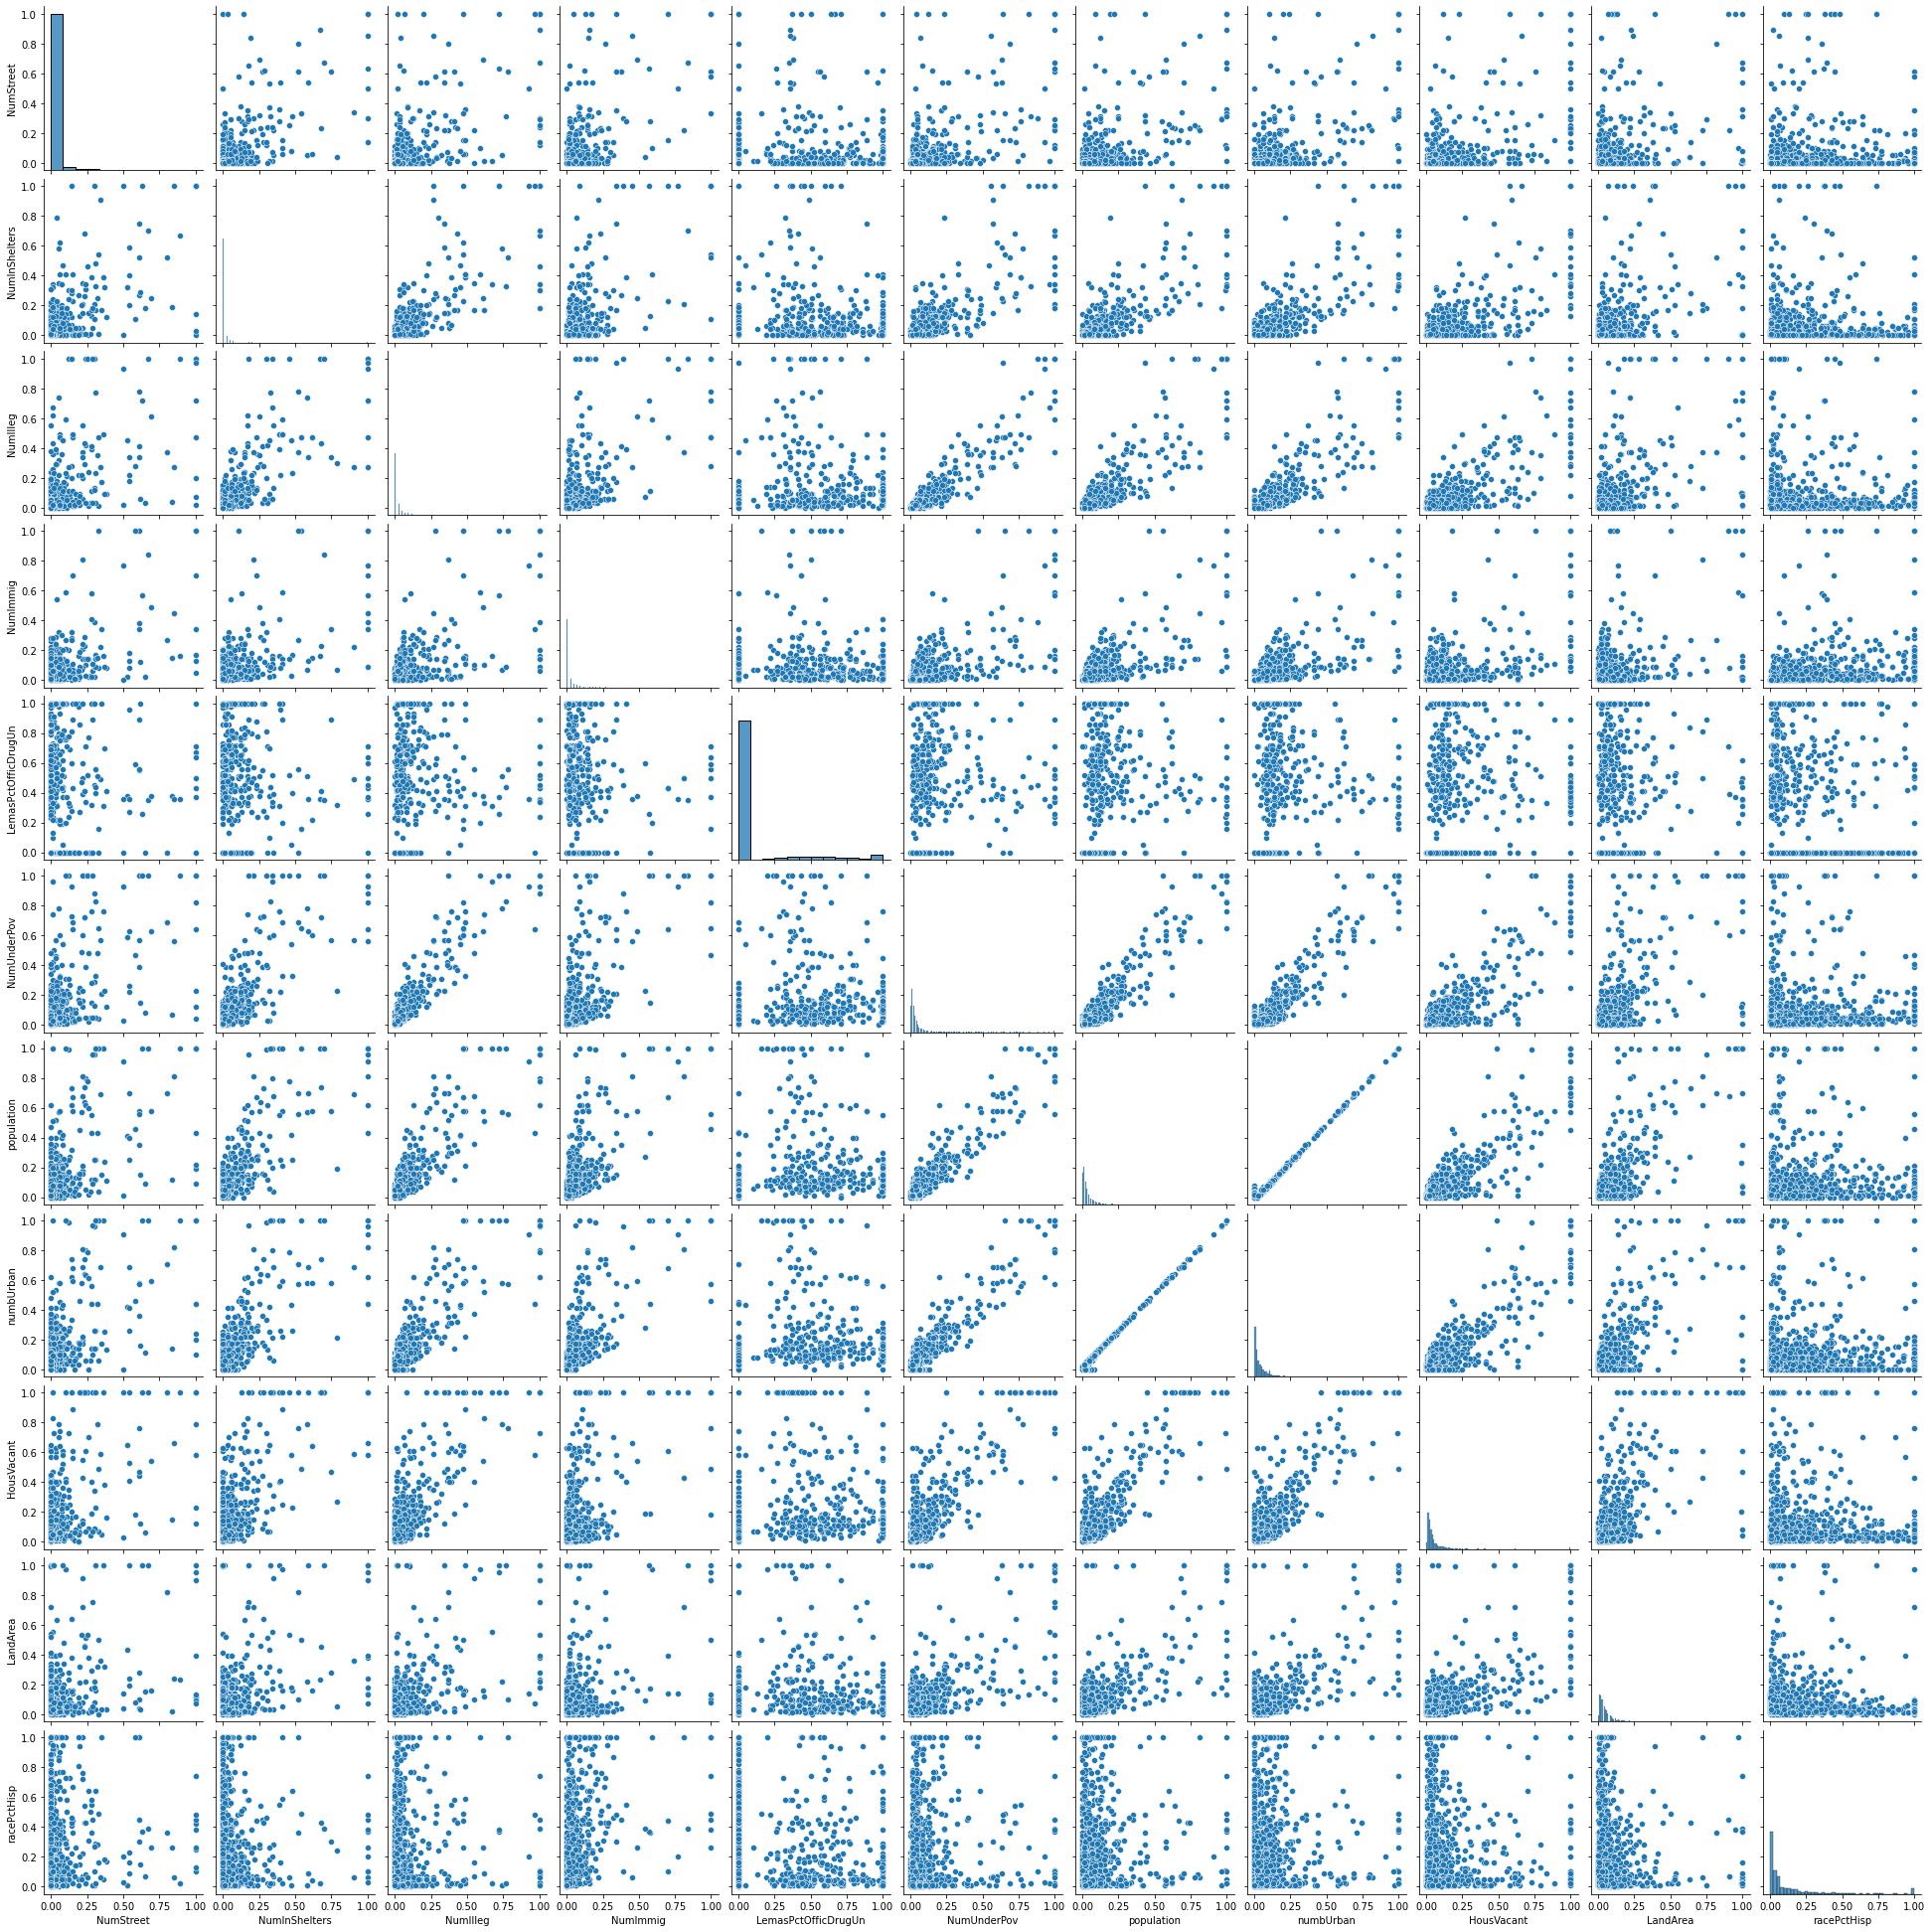

In [13]:
sorted_cv = cv.sort_values(ascending=False)

top = int(math.sqrt(len(cv)))
top_features = sorted_cv.index[:top]

sns.pairplot(imputed_df[top_features]);

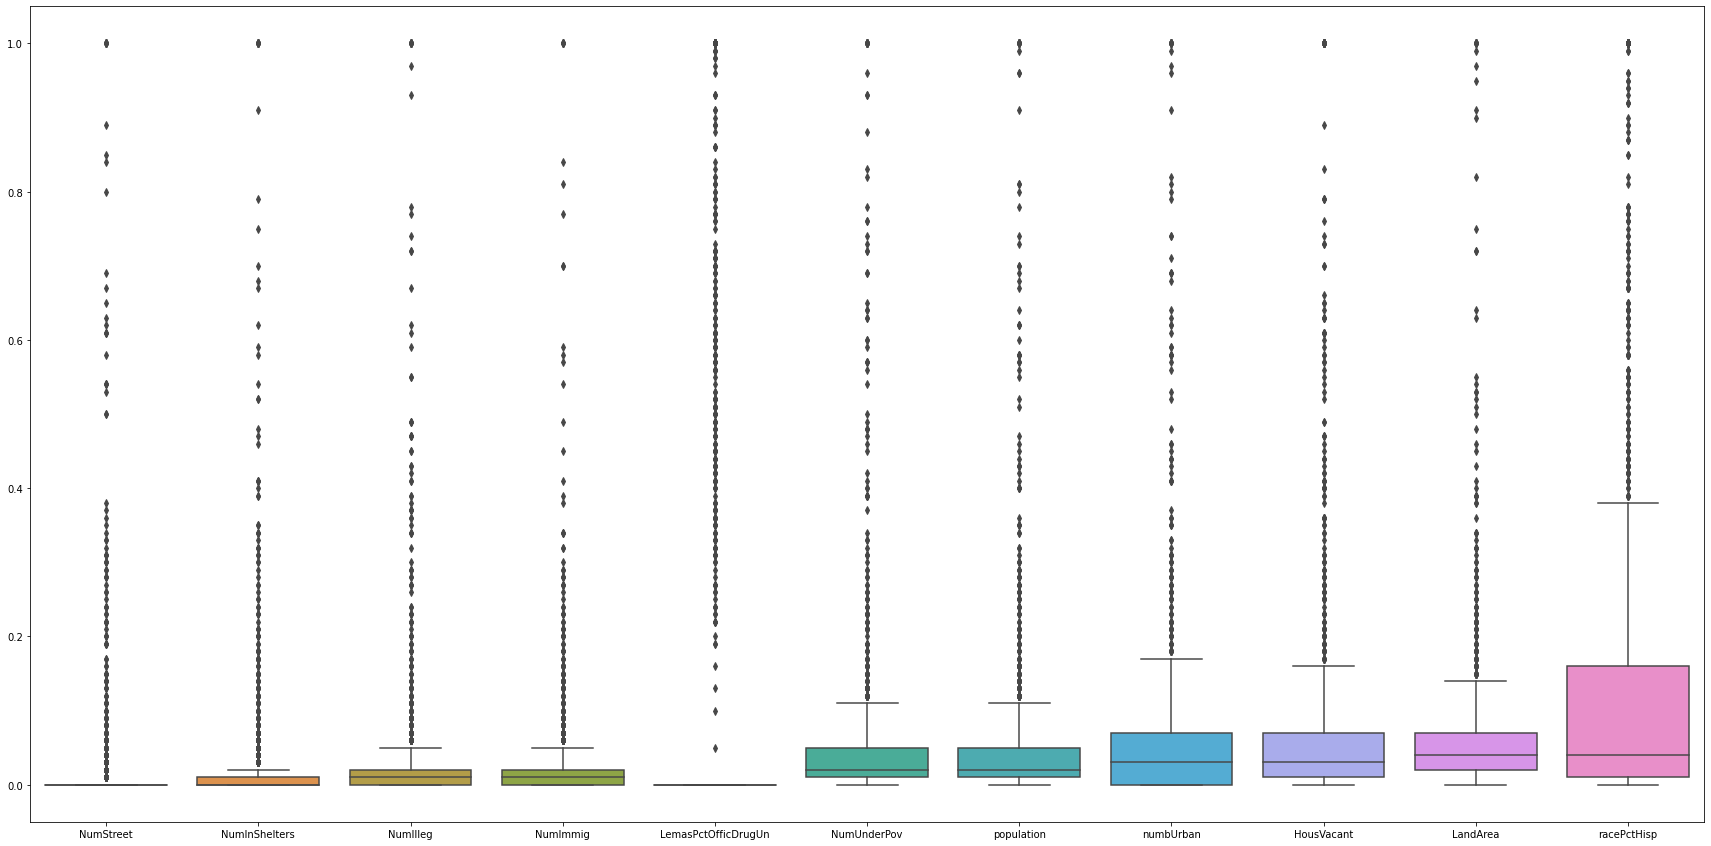

In [14]:
plt.figure(figsize=(30,15))
sns.boxplot(data=imputed_df[top_features]);

### Relying solely on scatterplots is insufficient for drawing conclusions regarding the significance of individual features.
### (f)

In [15]:
x_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

x_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

lr = LinearRegression()
lreg = lr.fit(x_train,y_train)
y_pred = lreg.predict(x_test)
mse_lreg = mean_squared_error(y_test, y_pred)
print('MSE =', mse_lreg)

MSE = 0.7897255274193568


### (g)

In [16]:
alphas = [0.01, 0.1, 1.0, 10.0]
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

ridge_cv.fit(x_train, y_train)
best_alpha = ridge_cv.alpha_

ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)

mse_ridge_reg = mean_squared_error(y_test, y_pred)

print('MSE_CV:', mse_ridge_reg)

MSE_CV: 0.01773708110430368


### (h)

In [17]:
lasso_reg = LassoCV(max_iter=1500)
lasso_reg.fit(x_train, y_train)
y_pred = lasso_reg.predict(x_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('Alpha:', lasso_reg.alpha_)

print('Coefficients:')
for i, coef in enumerate(lasso_reg.coef_):
    if coef != 0:
        print(x_train.columns[i], ':', coef)

MSE: 0.017763310017858244
Alpha: 0.00011614723626829846
Coefficients:
racepctblack : 0.27198908067598904
racePctAsian : -0.015489183016620799
agePct12t21 : 0.06630688001787342
agePct12t29 : -0.265007560751501
pctUrban : 0.04051855000983899
pctWWage : -0.08474297249597292
pctWFarmSelf : 0.026563751491558055
pctWInvInc : -0.0983065309341359
pctWSocSec : 0.04857451340458457
pctWPubAsst : 0.03880390286304732
pctWRetire : -0.10843719046535569
whitePerCap : -0.057682777833476875
blackPerCap : -0.021104804881504936
indianPerCap : -0.031122334453261596
AsianPerCap : 0.029014157846552886
OtherPerCap : 0.022710891815328735
HispPerCap : 0.023937028686758326
PctPopUnderPov : -0.14123178274870685
PctLess9thGrade : -0.018167061016534026
PctEmploy : 0.1373473488613637
PctEmplManu : -0.01577999423552379
PctOccupManu : 0.010230195656757002
MalePctDivorce : 0.11814669010826678
MalePctNevMarr : 0.13327799275885163
FemalePctDiv : -0.07847575781954072
PctKids2Par : -0.19648800093601304
PctYoungKids2Par : -

In [18]:
s_scaler = StandardScaler()
lasso_reg = LassoCV(max_iter=1500)

lasso_reg.fit(s_scaler.fit_transform(x_train), y_train)
y_pred = lasso_reg.predict(s_scaler.transform(x_test))
print('MSE_standardized:', mean_squared_error(y_test, y_pred))
print('Alpha:', lasso_reg.alpha_)

print('Coefficients:')
for i in range(0, len(x_train.columns)):
    if lasso_reg.coef_[i] != 0:
        print(x_train.columns[i], ':', lasso_reg.coef_[i])

MSE_standardized: 0.017810499483270535
Alpha: 0.0007630833878262516
Coefficients:
racepctblack : 0.06825952168266121
racePctAsian : -0.0008869549482896104
agePct12t21 : 0.010316887014133165
agePct12t29 : -0.03818718119652621
pctUrban : 0.016596760165681953
pctWWage : -0.01203104879965538
pctWFarmSelf : 0.0040908985981578235
pctWInvInc : -0.02079862739449483
pctWSocSec : 0.008905031591624004
pctWPubAsst : 0.006134048984523377
pctWRetire : -0.017187452987720085
whitePerCap : -0.008601901094764464
blackPerCap : -0.0036486436394936187
indianPerCap : -0.005237242600816369
AsianPerCap : 0.005307444995295821
OtherPerCap : 0.003818543884901224
HispPerCap : 0.003991479136406431
PctPopUnderPov : -0.026751911021071214
PctLess9thGrade : -0.002012210216728916
PctEmploy : 0.02118985599954819
PctEmplManu : -0.001053592558372608
MalePctDivorce : 0.018987802863889108
MalePctNevMarr : 0.020704297638561138
FemalePctDiv : -0.010036031154269655
PctKids2Par : -0.03980425700074501
PctYoungKids2Par : -0.00819

### Standardizing performs slightly worse.
### (i)

In [19]:
best_m, best_mse = 1, 1
m = range(1, 123)

for i in m:
    pca = PCA(n_components=i)
    x_ = pca.fit_transform(x_train)
    lreg = LinearRegression()
    scores = cross_validate(lreg, x_, y_train, cv=5, scoring=['r2', 'neg_mean_squared_error'])
    rSquare = np.mean(scores['test_r2'])
    mse_i = (np.mean(scores['test_neg_mean_squared_error'])) * -1
    
    if mse_i < best_mse:
        best_mse = mse_i
        best_m = i
        
    print('M:', i)
    print('R-Square:', rSquare)
    print('MSE:', mse_i)
    print()

print('Best M:', best_m)
print('Best MSE:', best_mse)

M: 1
R-Square: 0.32917892466045695
MSE: 0.03791058586285948

M: 2
R-Square: 0.45826272983938904
MSE: 0.030606866265883347

M: 3
R-Square: 0.5118541670707577
MSE: 0.02758454708206217

M: 4
R-Square: 0.5698077883502247
MSE: 0.024264179637756494

M: 5
R-Square: 0.5916438923371843
MSE: 0.023057205041115154

M: 6
R-Square: 0.6001202723703856
MSE: 0.02258319630291441

M: 7
R-Square: 0.6451280870279951
MSE: 0.02008287554610117

M: 8
R-Square: 0.644310319843959
MSE: 0.020129944004664703

M: 9
R-Square: 0.6453698028992972
MSE: 0.020067861246681466

M: 10
R-Square: 0.646613900663435
MSE: 0.019996473965123756

M: 11
R-Square: 0.6464140956410331
MSE: 0.020008881878701857

M: 12
R-Square: 0.6457792476493919
MSE: 0.020046367727666096

M: 13
R-Square: 0.6470552631141144
MSE: 0.019965479700942253

M: 14
R-Square: 0.6465452767320976
MSE: 0.019995647629054477

M: 15
R-Square: 0.6461546435968016
MSE: 0.020020036189862374

M: 16
R-Square: 0.6457678614191306
MSE: 0.020042666280057693

M: 17
R-Square: 0.645

In [20]:
pca = PCA(n_components=best_m)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

lreg.fit(x_train_pca, y_train)

y_pred = lreg.predict(x_test_pca)

test_error = mean_squared_error(y_test, y_pred)
print('MSE:', test_error)

MSE: 0.01848087906697764


### (i)

In [21]:
param_grid = {
    'reg_lambda': [0.001, 0.01, 0.1, 1.0, 10.0]
}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_lambda = grid_search.best_params_['reg_lambda']

best_xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=best_lambda)
best_xgb_reg.fit(x_train, y_train)

y_pred = best_xgb_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE_XGB:', mse)

MSE_XGB: 0.019519399914693522


### Reference:

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://xgboost.readthedocs.io/en/stable/python/python_api.html

https://snyk.io/advisor/python/xgboost/functions/xgboost.XGBRegressor

https://chat.openai.com/